Khai báo các thư viện cần thiết

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

Đọc dữ liệu và phân chia dữ liệu theo tỉ lệ train:test = 7:3

In [11]:
cancer_data = datasets.load_breast_cancer()
# show to test record 5th
print(cancer_data.data[5])
print(cancer_data.data.shape)
#target set
print(cancer_data.target)
from sklearn.model_selection import train_test_split
cancer_data = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.3, random_state=100)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

Chuẩn hóa dữ liệu

In [12]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(cancer_data.data)
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.fit_transform(X_test)

Giảm số chiều dữ liệu về 2 chiều

In [13]:
pca_02 = PCA(n_components=2)
X_pca_02 = pca_02.fit_transform(cancer_data.data)
X_train_pca_02 = pca_02.fit_transform(X_train_standard)
X_test_pca_02 = pca_02.fit_transform(X_test_standard)

Hiển thị dữ liệu đã giảm số chiều về 2 chiều

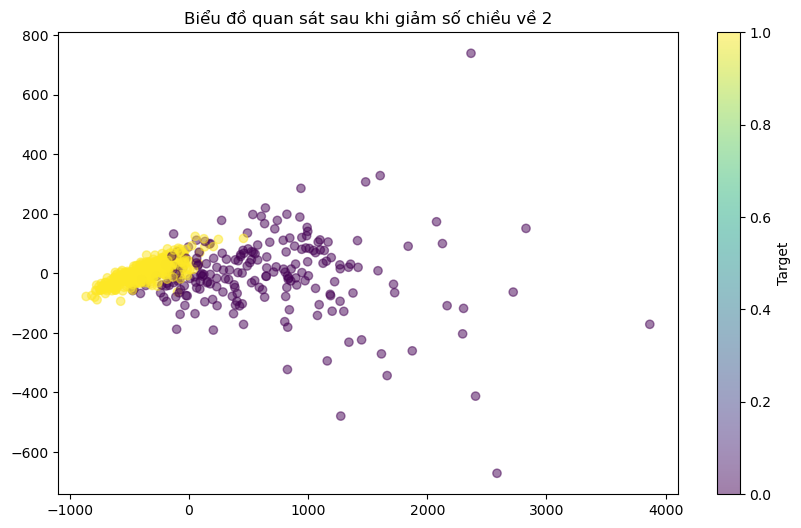

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_02[:, 0], X_pca_02[:, 1], c=cancer_data.target, cmap='viridis', alpha=0.5)
plt.title('Biểu đồ quan sát sau khi giảm số chiều về 2')
plt.colorbar(label='Target')
plt.show()

Chạy mô hình Logistic Regression

In [16]:
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train_pca_02, y_train)

y_pred_log_reg = model_log_reg.predict(X_test_pca_02)
print(f"Prediction:\n {y_pred_log_reg}")

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)

print("Accuracy: ", accuracy_log_reg)
print("Precision: ", precision_log_reg)
print("Recall: ", recall_log_reg)

Prediction:
 [0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1]
Accuracy:  0.9181286549707602
Precision:  0.8859649122807017
Recall:  0.9901960784313726
